Markov Chain Results (Percentage of Patients in Each State Over Time):
                 Year 0   Year 1     Year 2     Year 3     Year 4     Year 5
M (Maintenance)     0.0  34.5610  16.855578   8.061855   5.130039   4.275543
I (Initial)        85.5  11.6090   4.834083   5.024057   5.389348   5.537511
E (Episodic)       14.5   2.2325   1.050857   1.126271   1.212209   1.246015
N (Nonuse)          0.0  51.5830  77.294333  85.898911  88.464271  89.224050


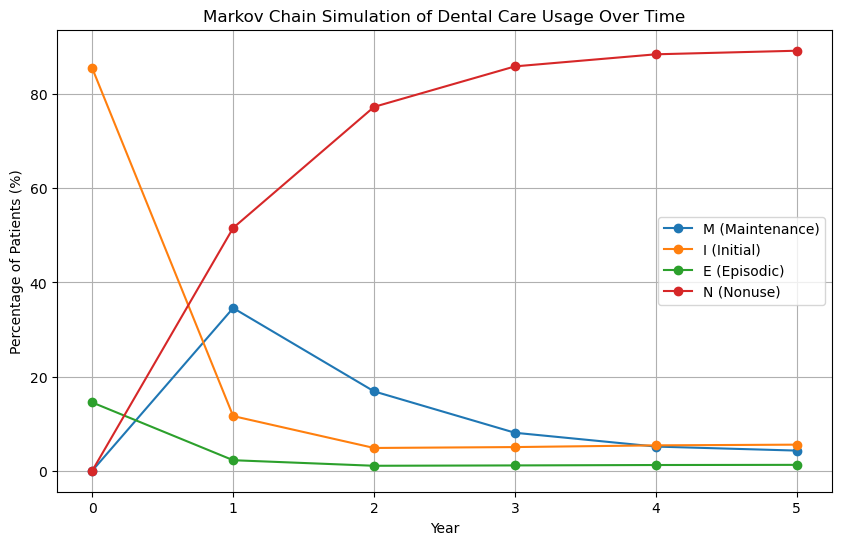

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the transition matrix P
P = np.array([[0.346, 0.014, 0.003, 0.637],
              [0.372, 0.110, 0.010, 0.508],
              [0.190, 0.152, 0.095, 0.562],
              [0.003, 0.053, 0.012, 0.933]])

# Define the initial distribution
initial_distribution = np.array([0, 0.855, 0.145, 0])  # 85.5% in I, 14.5% in E

# Number of years to simulate
years = 5

# Store the results
state_distributions = [initial_distribution]

# Compute state distributions for each year
for _ in range(years):
    next_distribution = state_distributions[-1] @ P
    state_distributions.append(next_distribution)

# Convert results into a DataFrame
df_results = pd.DataFrame(state_distributions, columns=["M (Maintenance)", "I (Initial)", "E (Episodic)", "N (Nonuse)"])
df_results.index.name = "Year"
df_results = df_results * 100  # Convert to percentages

# Transpose the results to match the book table format
df_results_transposed = df_results.T
df_results_transposed.columns = [f"Year {i}" for i in range(years + 1)]

# Display the results table
print("Markov Chain Results (Percentage of Patients in Each State Over Time):")
print(df_results_transposed)

# Plot the results
plt.figure(figsize=(10, 6))
for col in df_results.columns:
    plt.plot(df_results.index, df_results[col], marker='o', label=col)

plt.xlabel("Year")
plt.ylabel("Percentage of Patients (%)")
plt.title("Markov Chain Simulation of Dental Care Usage Over Time")
plt.legend()
plt.grid(True)
plt.show()